In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

df=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv", encoding='latin-1', index_col=0)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout

gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])

df = pd.get_dummies(df, columns=['Geography'], drop_first= True)
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
# Drop columns that are not needed
df = df.drop(['CustomerId', 'Surname'], axis=1)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9997,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9998,709,0,36,7,0.00,1,0,1,42085.58,1,0,0


Descriptive Analysis

<Axes: >

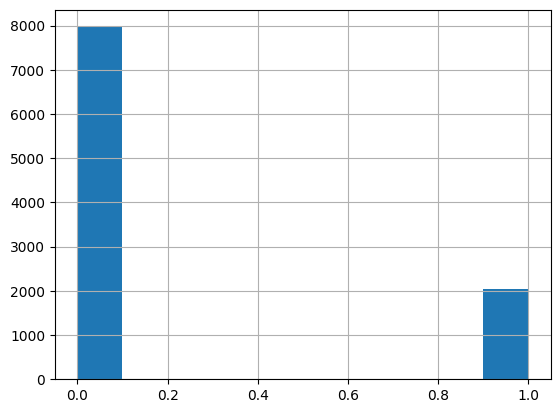

In [ ]:
df.Exited.hist()

# Train Test Split


In [ ]:

# Train-test-validation split
train,test=train_test_split(df,test_size=0.2,stratify=df["Exited"])
print(train.shape,test.shape)


(8000, 12) (2000, 12)


3 hidden layer
activation fuction: relu
optimizer: adam
batch_size:32 epochs: 64

In [ ]:
import keras
from keras import models
from keras import layers

X_train = train.drop(columns=['Exited'])
y_train = train['Exited']
X_val = test.drop(columns=['Exited'])
y_val = test['Exited']


# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(df.shape[1]-1,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_hist = model.fit(X_train,y_train,
                       validation_data=(X_val, y_val),
                       batch_size=64,epochs=64)

Epoch 1/64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6676 - loss: 936.2387 - val_accuracy: 0.7740 - val_loss: 121.0083
Epoch 2/64
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 81.1861 - val_accuracy: 0.7115 - val_loss: 138.6269
Epoch 3/64
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6937 - loss: 77.1071 - val_accuracy: 0.7325 - val_loss: 74.5746
Epoch 4/64
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6909 - loss: 57.9074 - val_accuracy: 0.7210 - val_loss: 25.7668
Epoch 5/64
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6824 - loss: 50.1510 - val_accuracy: 0.7645 - val_loss: 63.3340
Epoch 6/64
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6911 - loss: 62.6338 - val_accuracy: 0.4620 - val_loss: 31.8719
Epoch 7/64
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 61.4459 - val_accuracy: 0.7655 - val_loss: 37.7211
Epoch 8/64
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6821 - loss: 62.5089 - val_accur

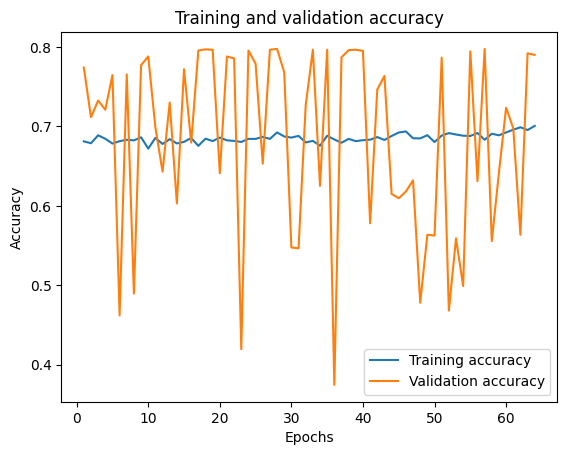

In [ ]:

def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plotresults(model_hist)


In [ ]:

# Define the model
model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(df.shape[1]-1,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_hist = model.fit(X_train,y_train,
                       validation_data=(X_val, y_val),
                       batch_size=32,epochs=64)

Epoch 1/64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6836 - loss: 141.9185 - val_accuracy: 0.7950 - val_loss: 22.2622
Epoch 2/64
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6804 - loss: 24.0784 - val_accuracy: 0.7825 - val_loss: 9.4305
Epoch 3/64
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6715 - loss: 14.7629 - val_accuracy: 0.7325 - val_loss: 7.2485
Epoch 4/64
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6898 - loss: 10.6858 - val_accuracy: 0.2865 - val_loss: 13.7465
Epoch 5/64
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6652 - loss: 10.8540 - val_accuracy: 0.7815 - val_loss: 9.5999
Epoch 6/64
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6838 - loss: 7.2129 - val_accuracy: 0.3165 - val_loss: 8.1037
Epoch 7/64
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6719 - loss: 4.3908 - val_accuracy: 0.7965 - val_loss: 2.9811
Epoch 8/64
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6794 - loss: 4.7808 - val_accuracy: 0.676

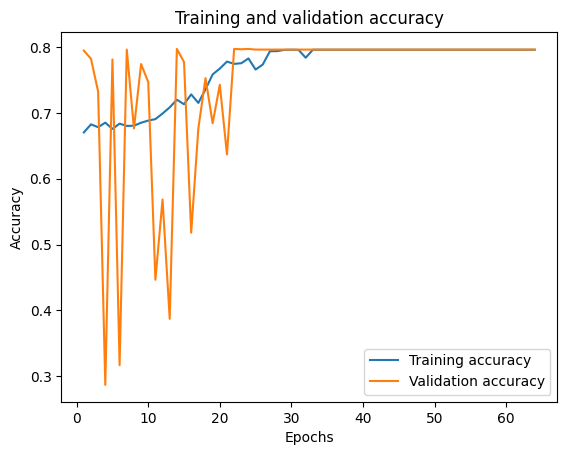

In [ ]:

def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plotresults(model_hist)

StandardScaler is used to normalize or standardize the features in the training and test datasets.

In [ ]:
from imblearn.over_sampling import SMOTE


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
# transform the dataset

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
from collections import Counter
print(f"SMOTE before: {Counter(y_train)}")
print(f"SMOTE after: {Counter(y_train_smote)}")

SMOTE before: Counter({0: 6370, 1: 1630})
SMOTE after: Counter({0: 6370, 1: 6370})


In [ ]:
# Define the model
model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_hist = model.fit(X_train_smote,y_train_smote,
                       validation_data=(X_val, y_val),
                       batch_size=32,epochs=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6771 - loss: 0.5857 - val_accuracy: 0.7665 - val_loss: 0.4901
Epoch 2/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7889 - loss: 0.4439 - val_accuracy: 0.7645 - val_loss: 0.4878
Epoch 3/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8031 - loss: 0.4227 - val_accuracy: 0.7940 - val_loss: 0.4294
Epoch 4/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8096 - loss: 0.4116 - val_accuracy: 0.8150 - val_loss: 0.4118
Epoch 5/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8154 - loss: 0.3922 - val_accuracy: 0.8005 - val_loss: 0.4333
Epoch 6/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8267 - loss: 0.3823 - val_accuracy: 0.7600 - val_loss: 0.4992
Epoch 7/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8228 - loss: 0.3754 - val_accuracy: 0.7935 - val_loss: 0.4583
Epoch 8/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8402 - loss: 0.3557 - val_accuracy: 0.

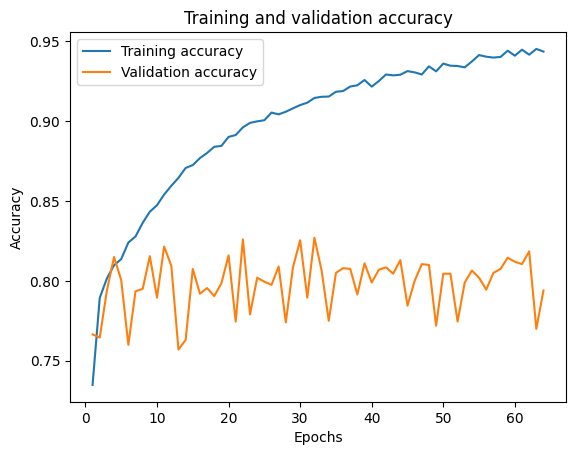

In [ ]:
def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plotresults(model_hist)

In [ ]:
from keras.losses import binary_crossentropy

# real y
real = test.Exited.astype("int").values
# predicted y
pred = model.predict(test.drop("Exited",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3.2800328731536865
0.7965


In [ ]:
#Model Evaluation

print('Training loss:', model_hist.history['loss'][-1])
print('Training accuracy:', model_hist.history['accuracy'][-1], '\n')
score = model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training loss: 0.14901861548423767
Training accuracy: 0.9436420798301697 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7942 - loss: 0.7329
Test loss: 0.7808079123497009
Test accuracy: 0.7940000295639038


In [ ]:
from keras.regularizers import l2
# Define the model
model = models.Sequential()
model.add(Dense(75, activation='relu', input_shape=(df.shape[1]-1,)))
model.add(Dropout(0.15))
model.add(Dense(32, activation='relu', kernel_regularizer="l2"))
model.add(Dense(32,activation='relu', kernel_regularizer="l2"))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_hist = model.fit(X_train_smote,y_train_smote,
                       validation_data=(X_val, y_val),
                       batch_size=64,epochs=45)


Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6530 - loss: 1.1420 - val_accuracy: 0.7600 - val_loss: 0.6633
Epoch 2/45
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7532 - loss: 0.6335 - val_accuracy: 0.7480 - val_loss: 0.5675
Epoch 3/45
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7744 - loss: 0.5394 - val_accuracy: 0.8025 - val_loss: 0.4755
Epoch 4/45
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7716 - loss: 0.5113 - val_accuracy: 0.8050 - val_loss: 0.4674
Epoch 5/45
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7911 - loss: 0.4880 - val_accuracy: 0.7830 - val_loss: 0.4905
Epoch 6/45
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7899 - loss: 0.4772 - val_accuracy: 0.8025 - val_loss: 0.4541
Epoch 7/45
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7837 - loss: 0.4728 - val_accuracy: 0.7430 - val_loss: 0.5382
Epoch 8/45
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7883 - loss: 0.4701 - val_accuracy: 0.8135 - val_

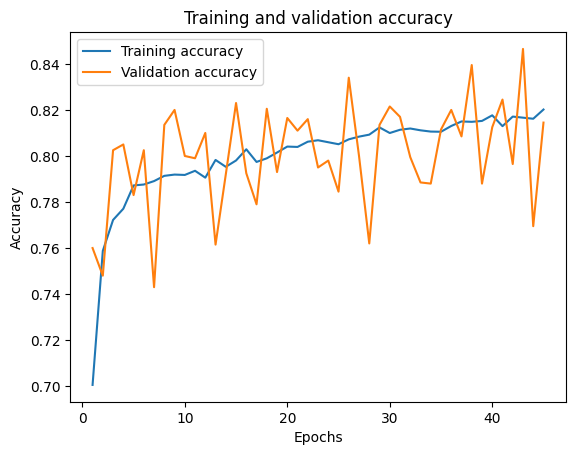

In [ ]:
def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plotresults(model_hist)

In [ ]:
from keras.losses import binary_crossentropy

# real y
real = test.Exited.astype("int").values
# predicted y
pred = model.predict(test.drop("Exited",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3.2800328731536865
0.7965


In [ ]:
print('Training loss:', model_hist.history['loss'][-1])
print('Training accuracy:', model_hist.history['accuracy'][-1], '\n')
score = model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training loss: 0.4105168282985687
Training accuracy: 0.8201726675033569 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8249 - loss: 0.3911
Test loss: 0.41477105021476746
Test accuracy: 0.8144999742507935


change optimizer to RMSPROP

In [ ]:

# Define the model
model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(df.shape[1]-1,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model_hist = model.fit(X_train_smote,y_train_smote,
                       validation_data=(X_val, y_val),
                       batch_size=32,epochs=64)

Epoch 1/64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7136 - loss: 0.5664 - val_accuracy: 0.6800 - val_loss: 0.6033
Epoch 2/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7855 - loss: 0.4553 - val_accuracy: 0.7860 - val_loss: 0.4560
Epoch 3/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7881 - loss: 0.4401 - val_accuracy: 0.7960 - val_loss: 0.4378
Epoch 4/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7957 - loss: 0.4276 - val_accuracy: 0.7735 - val_loss: 0.4676
Epoch 5/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8020 - loss: 0.4193 - val_accuracy: 0.7600 - val_loss: 0.4875
Epoch 6/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8100 - loss: 0.4054 - val_accuracy: 0.7690 - val_loss: 0.4854
Epoch 7/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8164 - loss: 0.3980 - val_accuracy: 0.8230 - val_loss: 0.3904
Epoch 8/64
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.3899 - val_accuracy: 0.8090 - val_

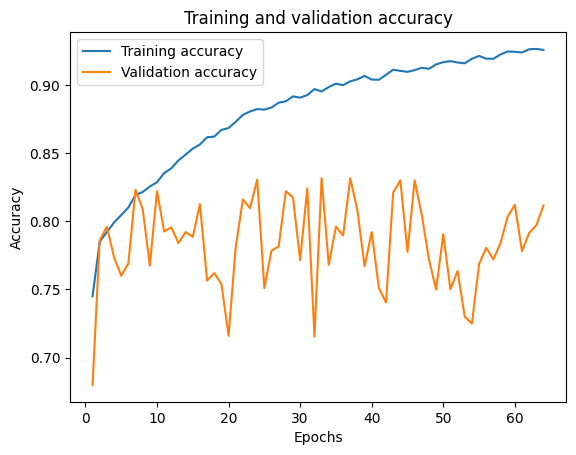

In [ ]:
def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plotresults(model_hist)

In [ ]:
from keras.losses import binary_crossentropy

# real y
real = test.Exited.astype("int").values
# predicted y
pred = model.predict(test.drop("Exited",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3.2800328731536865
0.7965


In [ ]:
print('Training loss:', model_hist.history['loss'][-1])
print('Training accuracy:', model_hist.history['accuracy'][-1], '\n')
score = model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training loss: 0.19020630419254303
Training accuracy: 0.9255886673927307 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8244 - loss: 0.7035
Test loss: 0.7510403394699097
Test accuracy: 0.8115000128746033


Rmsprop is better than adam

In [ ]:

# Define the model
model = models.Sequential()
model.add(Dense(75, activation='relu', input_shape=(df.shape[1]-1,)))
model.add(Dropout(0.15))
model.add(Dense(32, activation='relu',kernel_regularizer="l2"))
model.add(Dropout(0.05))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model_hist = model.fit(X_train_smote,y_train_smote,
                       validation_data=(X_val, y_val),
                       batch_size=54,epochs=45)

Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6531 - loss: 0.8983 - val_accuracy: 0.7775 - val_loss: 0.5646
Epoch 2/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7590 - loss: 0.5769 - val_accuracy: 0.8110 - val_loss: 0.4824
Epoch 3/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7703 - loss: 0.5188 - val_accuracy: 0.7885 - val_loss: 0.4893
Epoch 4/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7878 - loss: 0.4817 - val_accuracy: 0.8095 - val_loss: 0.4484
Epoch 5/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7845 - loss: 0.4795 - val_accuracy: 0.7845 - val_loss: 0.4802
Epoch 6/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7912 - loss: 0.4634 - val_accuracy: 0.8125 - val_loss: 0.4411
Epoch 7/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7906 - loss: 0.4631 - val_accuracy: 0.8135 - val_loss: 0.4259
Epoch 8/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7923 - loss: 0.4593 - val_accuracy: 0.8160 - val_

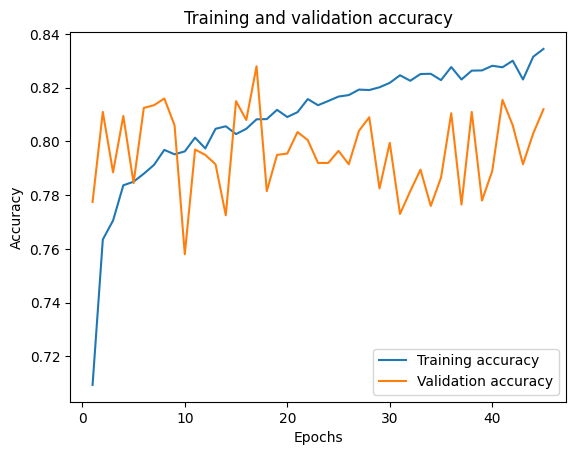

In [ ]:
def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plotresults(model_hist)

In [ ]:
print('Training loss:', model_hist.history['loss'][-1])
print('Training accuracy:', model_hist.history['accuracy'][-1], '\n')
score = model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training loss: 0.3968350291252136
Training accuracy: 0.8344584107398987 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8205 - loss: 0.4210
Test loss: 0.43984517455101013
Test accuracy: 0.8119999766349792


In [ ]:
from keras.losses import binary_crossentropy

# real y
real = test.Exited.astype("int").values
# predicted y
pred = model.predict(test.drop("Exited",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3.2800328731536865
0.7965


In [ ]:
model = models.Sequential()
model.add(Dense(98, activation='relu', input_shape=(df.shape[1]-1,)))
model.add(Dropout(0.05))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

model_hist = model.fit(X_train_smote,y_train_smote,
                       validation_data=(X_val, y_val),
                       batch_size=32,epochs=45)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5999 - loss: 0.6744 - val_accuracy: 0.6625 - val_loss: 0.6521
Epoch 2/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6823 - loss: 0.6198 - val_accuracy: 0.7135 - val_loss: 0.5928
Epoch 3/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7063 - loss: 0.5732 - val_accuracy: 0.7465 - val_loss: 0.5399
Epoch 4/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7290 - loss: 0.5442 - val_accuracy: 0.7465 - val_loss: 0.5247
Epoch 5/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7393 - loss: 0.5255 - val_accuracy: 0.7465 - val_loss: 0.5267
Epoch 6/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7498 - loss: 0.5053 - val_accuracy: 0.7750 - val_loss: 0.4724
Epoch 7/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7610 - loss: 0.4847 - val_accuracy: 0.7840 - val_loss: 0.4519
Epoch 8/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7784 - loss: 0.4722 - val_accuracy: 0.

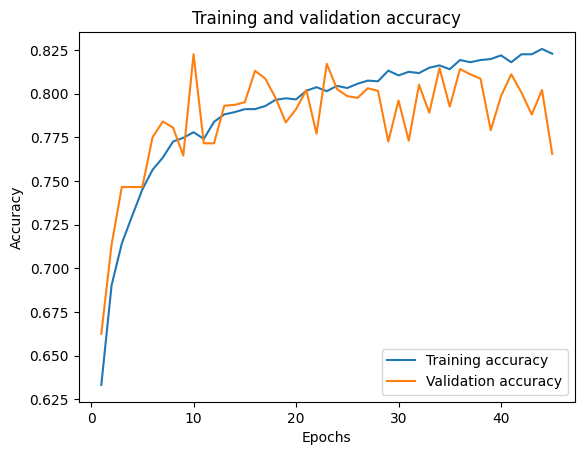

In [ ]:
def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plotresults(model_hist)

In [ ]:
from keras.losses import binary_crossentropy

# real y
real = test.Exited.astype("int").values
# predicted y
pred = model.predict(test.drop("Exited",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3.2800328731536865
0.7965


In [ ]:
print('Training loss:', model_hist.history['loss'][-1])
print('Training accuracy:', model_hist.history['accuracy'][-1], '\n')
score = model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training loss: 0.3860814869403839
Training accuracy: 0.8227629661560059 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7692 - loss: 0.4832
Test loss: 0.49588653445243835
Test accuracy: 0.765500009059906


In [ ]:
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
model = Sequential()

model.add(Dense(units=98, activation='relu', input_shape = (df.shape[1]-1,), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_hist = model.fit(X_train_smote, y_train_smote, batch_size=50, epochs=45,
                                            validation_data=(X_val, y_val),
                                            callbacks=[early_stopping])

Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6191 - loss: 0.7280 - val_accuracy: 0.7665 - val_loss: 0.5699
Epoch 2/45
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7423 - loss: 0.5798 - val_accuracy: 0.7850 - val_loss: 0.5225
Epoch 3/45
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7648 - loss: 0.5438 - val_accuracy: 0.7830 - val_loss: 0.5208
Epoch 4/45
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7866 - loss: 0.5062 - val_accuracy: 0.7905 - val_loss: 0.5069
Epoch 5/45
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7878 - loss: 0.5092 - val_accuracy: 0.7880 - val_loss: 0.4991
Epoch 6/45
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7952 - loss: 0.4867 - val_accuracy: 0.7975 - val_loss: 0.4798
Epoch 7/45
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8016 - loss: 0.4791 - val_accuracy: 0.7830 - val_loss: 0.4975
Epoch 8/45
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8136 - loss: 0.4613 - val_accuracy: 0.7935 - val_

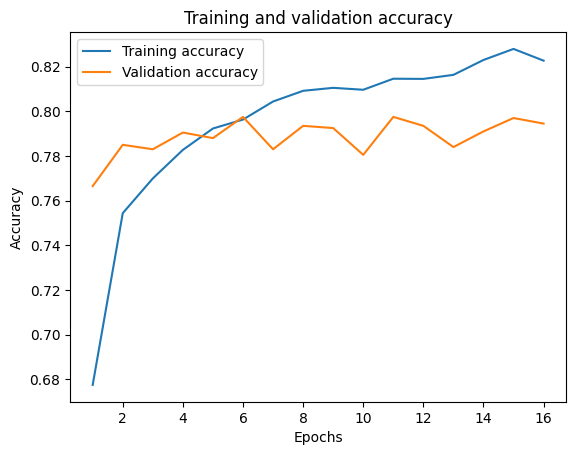

In [ ]:
def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plotresults(model_hist)

In [ ]:
from keras.losses import binary_crossentropy

# real y
real = test.Exited.astype("int").values
# predicted y
pred = model.predict(test.drop("Exited",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6.4994683265686035
0.5935


In [ ]:
print('Training loss:', model_hist.history['loss'][-1])
print('Training accuracy:', model_hist.history['accuracy'][-1], '\n')
score = model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training loss: 0.42663732171058655
Training accuracy: 0.8226844668388367 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7991 - loss: 0.4642
Test loss: 0.47965946793556213
Test accuracy: 0.7975000143051147


In [97]:
from keras.optimizers import RMSprop
model = Sequential()

model.add(Dense(units=98, activation='relu', input_shape = (df.shape[1]-1,)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



model_hist = model.fit(X_train_smote, y_train_smote, batch_size=54, epochs=45,
                                            validation_data=(X_val, y_val)
                                            )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6009 - loss: 0.6916 - val_accuracy: 0.7595 - val_loss: 0.5406
Epoch 2/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7432 - loss: 0.5380 - val_accuracy: 0.7680 - val_loss: 0.4844
Epoch 3/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7655 - loss: 0.5032 - val_accuracy: 0.7785 - val_loss: 0.4668
Epoch 4/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7794 - loss: 0.4799 - val_accuracy: 0.7820 - val_loss: 0.4746
Epoch 5/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7847 - loss: 0.4742 - val_accuracy: 0.7940 - val_loss: 0.4495
Epoch 6/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7785 - loss: 0.4836 - val_accuracy: 0.7960 - val_loss: 0.4604
Epoch 7/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7961 - loss: 0.4607 - val_accuracy: 0.8000 - val_loss: 0.4482
Epoch 8/45
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7924 - loss: 0.4607 - val_accuracy: 0.

In [ ]:
from keras.losses import binary_crossentropy

# real y
real = test.Exited.astype("int").values
# predicted y
pred = model.predict(test.drop("Exited",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
3.2800328731536865
0.7965


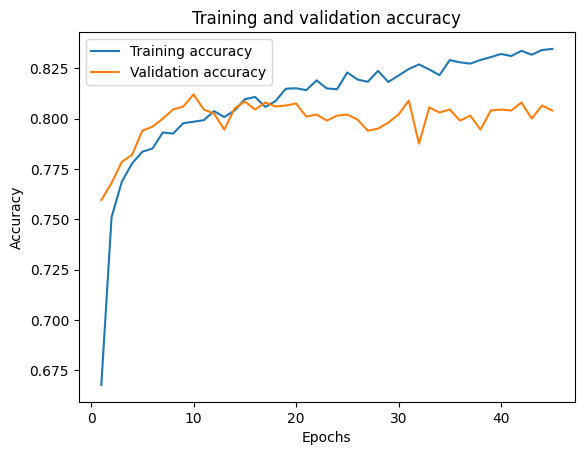

In [98]:
def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plotresults(model_hist)

In [99]:
print('Training loss:', model_hist.history['loss'][-1])
print('Training accuracy:', model_hist.history['accuracy'][-1], '\n')
score = model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training loss: 0.38200053572654724
Training accuracy: 0.8346154093742371 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7937 - loss: 0.4651
Test loss: 0.4488213062286377
Test accuracy: 0.8040000200271606
